# Package testing

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

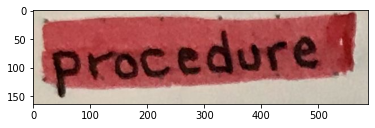

In [2]:
test = "../../data-sources/highlighted-words/unseen_word_raw.png"
image = imload(test)
plt.imshow(image)

## `preprocessing` pkg

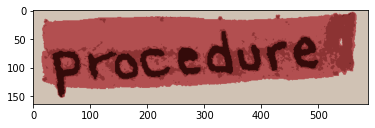

In [3]:
from tfgpkg.preproc.word import Quantize

quantized_image = Quantize.reduce_palette(image, 4)
plt.imshow(quantized_image)

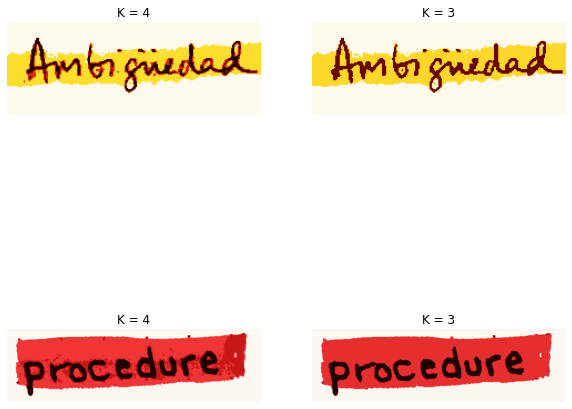

In [4]:
from tfgpkg.preproc.word import Quantize

test1 = "../data-sources/highlighted-words/page0.png"
test2 = "../data-sources/highlighted-words/unseen_word.png"

image1 = imload(test1)
image2 = imload(test2)

quantized_image1 = Quantize.reduce_palette(image1, 4)
quantized_image2 = Quantize.reduce_palette(image1, 3)
quantized_image3 = Quantize.reduce_palette(image2, 4)
quantized_image4 = Quantize.reduce_palette(image2, 3)

_, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()

axes[0].imshow(quantized_image1)
axes[0].set_title("K = 4")
axes[0].axis("off")

axes[1].imshow(quantized_image2)
axes[1].set_title("K = 3")
axes[1].axis("off")

axes[2].imshow(quantized_image3)
axes[2].set_title("K = 4")
axes[2].axis("off")

axes[3].imshow(quantized_image4)
axes[3].set_title("K = 3")
axes[3].axis("off")

plt.show()

Wall time: 24 ms


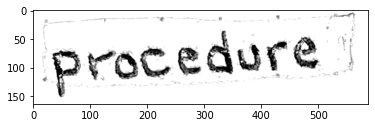

In [4]:
from tfgpkg.preproc.binarize import IlluminationBinarizer

%time bin_image = IlluminationBinarizer.illumination_compensation(image)
plt.imshow(bin_image, cmap="gray")

### Performance comparison

In [8]:
image1 = image
image2 = imload("../../data-sources/spanish-words-originals/test2_line1.jpg")
image3 = imload("../../data-sources/spanish-words-originals/test3_mini.jpg")

print(image1.shape, image2.shape, image3.shape)

(164, 588, 3) (209, 2104, 3) (1542, 1158, 3)


In [16]:
%timeit IlluminationBinarizer.illumination_compensation(image3, debug=True)

30.6 s ± 778 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit IlluminationBinarizer.illumination_compensation(image3, debug=False)

303 ms ± 31.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


With numba and image downscaling:

In [ ]:
from skimage.filters import threshold_niblack, threshold_sauvola

gray = to_gray(image)

window_size = 9
thresh_niblack = threshold_niblack(gray, window_size=window_size, k=.5)
thresh_sauvola = threshold_sauvola(gray, window_size=window_size)

binary_niblack = gray > thresh_niblack
binary_sauvola = gray > thresh_sauvola

_, axes = plt.subplots(2,2, figsize=(15,10))
axes = axes.flatten()

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(binary_sauvola, cmap="gray")
axes[1].set_title("Sauvola")
axes[1].axis("off")

axes[2].imshow(binary_niblack, cmap="gray")
axes[2].set_title("Niblack")
axes[2].axis("off")

axes[3].imshow(bin_image, cmap="gray")
axes[3].set_title("Illumination Compensation")
axes[3].axis("off")

plt.show()

In [ ]:
%%time
test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = IlluminationBinarizer.imread(test)

bin_image = IlluminationBinarizer.illumination_compensation(image)

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(20,20))

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(bin_image, cmap="gray")
axes[1].set_title("Original")
axes[1].axis("off")

plt.show()

In [ ]:
from skimage.filters import threshold_niblack, threshold_sauvola

test = "../data-sources/spanish-words-originals/test2.jpg"
image = imload(test)
gray = to_gray(image)

w1, w2 = 3, 25

# thresh_nib1 = threshold_niblack(gray, window_size=w1, k=.1)
# thresh_nib2 = threshold_niblack(gray, window_size=w2, k=.1)

thresh_sauv1 = threshold_sauvola(gray, window_size=w1)
thresh_sauv2 = threshold_sauvola(gray, window_size=w2)

# nib1 = gray > thresh_nib1
# nib2 = gray > thresh_nib2
sauv1 = gray > thresh_sauv1
sauv2 = gray > thresh_sauv2

illum = RobustBinarize.illumination_compensation(image)

_, axes = plt.subplots(1,5, figsize=(50,50))
axes = axes.flatten()

axes[0].imshow(image); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(gray, cmap="gray"); axes[1].set_title("Grayscale"); axes[1].axis("off")

# axes[2].imshow(nib1, cmap="gray"); axes[2].set_title(f"Niblack (WZ = {w1})"); axes[2].axis("off")
# axes[3].imshow(nib1, cmap="gray"); axes[3].set_title(f"Niblack (WZ = {w2})"); axes[3].axis("off")

axes[2].imshow(sauv1, cmap="gray"); axes[2].set_title(f"Sauvola (WZ = {w1})"); axes[2].axis("off")
axes[3].imshow(sauv2, cmap="gray"); axes[3].set_title(f"Sauvola (WZ = {w2})"); axes[3].axis("off")

axes[4].imshow(illum, cmap="gray"); axes[4].set_title("Illumination\nCompensation"); axes[4].axis("off")

plt.show()

In [ ]:
from skimage.filters import threshold_niblack, threshold_sauvola

test = "../data-sources/spanish-words-originals/test3.jpg"
image = imload(test)
gray = to_gray(image)

w1, w2 = 3, 25

# thresh_nib1 = threshold_niblack(gray, window_size=w1, k=.1)
# thresh_nib2 = threshold_niblack(gray, window_size=w2, k=.1)

thresh_sauv1 = threshold_sauvola(gray, window_size=w1)
thresh_sauv2 = threshold_sauvola(gray, window_size=w2)

# nib1 = gray > thresh_nib1
# nib2 = gray > thresh_nib2
sauv1 = gray > thresh_sauv1
sauv2 = gray > thresh_sauv2

illum = RobustBinarize.illumination_compensation(image)

_, axes = plt.subplots(1,5, figsize=(50,50))
axes = axes.flatten()

axes[0].imshow(image); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(gray, cmap="gray"); axes[1].set_title("Grayscale"); axes[1].axis("off")

# axes[2].imshow(nib1, cmap="gray"); axes[2].set_title(f"Niblack (WZ = {w1})"); axes[2].axis("off")
# axes[3].imshow(nib1, cmap="gray"); axes[3].set_title(f"Niblack (WZ = {w2})"); axes[3].axis("off")

axes[2].imshow(sauv1, cmap="gray"); axes[2].set_title(f"Sauvola (WZ = {w1})"); axes[2].axis("off")
axes[3].imshow(sauv2, cmap="gray"); axes[3].set_title(f"Sauvola (WZ = {w2})"); axes[3].axis("off")

axes[4].imshow(illum, cmap="gray"); axes[4].set_title("Illumination\nCompensation"); axes[4].axis("off")

plt.show()

In [ ]:
%%time
test = "../data-sources/spanish-words-originals/test1.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
test = "../data-sources/spanish-words-originals/test2.jpg"
image = RobustBinarize.imread(test)

bin_image = RobustBinarize.illumination_compensation(image)
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=23)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test1.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=7)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test2.JPG"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=21)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

In [ ]:
%%time
from preproc import FastBinarize

test = "../data-sources/spanish-words-originals/test3_mini_lowq.jpg"
image = imload(test)

bin_image = FastBinarize.threshold_sauvola(image, window_sz=3)  # window size is quite uncertain
plt.figure(figsize=(8,8))
plt.imshow(bin_image, cmap="gray")

---

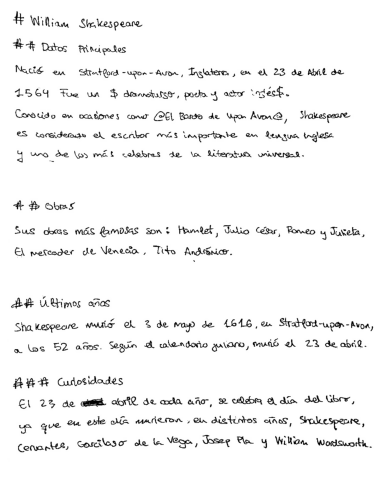

In [1]:
from tfgpkg.preproc.line import LineSegmentation
from tfgpkg.preproc.binarize import IlluminationBinarizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rcParams['figure.figsize'] = (10, 9)

# input: binarized (or grayscale) image in BGR mode
image = cv2.imread("../../data-sources/spanish-words-originals/test3_mini_lowq_bin.jpg")

plt.imshow(image)
plt.axis("off")
plt.show()

In [2]:
%load_ext line_profiler
# %load_ext heat

In [3]:
%%time
lines = LineSegmentation(image).find_lines(debug=False)

C:\Users\Pachacho\miniconda3\envs\tfg\lib\site-packages\numba\core\ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'rects' of function 'mergeRects'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\tfgpkg\preproc\line\line.py", line 50:
@nb.njit(cache=True)
def mergeRects(rects):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Wall time: 1.47 s


In [4]:
%%prun
lines = LineSegmentation(image).find_lines()

In [7]:
segmenter = LineSegmentation(image)
%lprun -f segmenter.find_lines segmenter.find_lines()

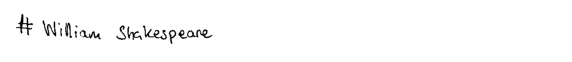

In [7]:
plt.imshow(lines[0][0], cmap="gray")
plt.axis("off")
plt.show()

In [8]:
lines1 = [line[-1] for line in lines]
lines2 = [(int(start), int(end)) for ((start, _), (end, _)) in zip(lines1, lines1[1:])]

print(lines2)

[(0, 87), (87, 165), (165, 242), (242, 311), (311, 379), (379, 438), (438, 547), (547, 666), (666, 741), (741, 856), (856, 969), (969, 1037), (1037, 1128), (1128, 1215), (1215, 1277), (1277, 1346)]


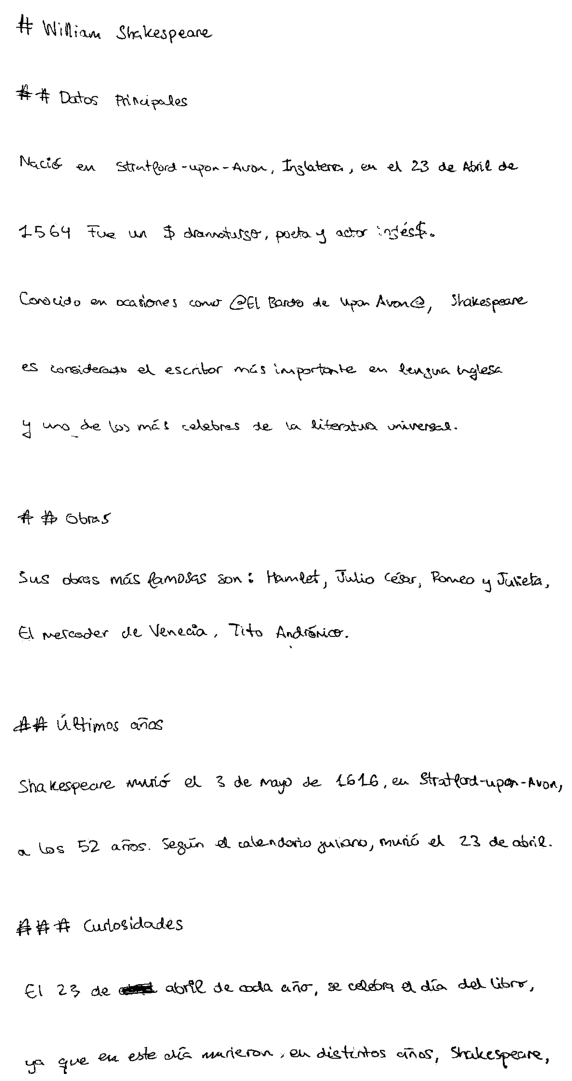

In [9]:
_, axes = plt.subplots(len(lines2), 1, figsize=(10,20))
axes.flatten()

for i, (s, e) in enumerate(lines2):
    axes[i].imshow(image[s:e, :, 0], cmap="gray")
    axes[i].axis("off")
    
plt.show()

In [ ]:
sample_img = (np.random.random_sample(100).reshape((10,10)) * 255) #.astype("float32")
sample_img = np.array([[np.round(x, 3) for x in row ]for row in sample_img])
# sample_img

In [ ]:
from scipy.signal import find_peaks

thres = np.mean(x) / x.max()
peaks = find_peaks(x, threshold=thres, distance=50)

In [ ]:
x

In [ ]:
results, info = peaks

In [ ]:
x[results]

In [ ]:
plt.figure()
plt.imshow(lines[0][0], cmap="gray")
plt.show()

plt.figure()
plt.imshow(lines[-2][0], cmap="gray")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(lines[-3][0], cmap="gray")
plt.axis("off")
plt.show()

---

In [ ]:
from preproc.word import WordSegmentation

line, params = lines[-3]

splitter = WordSegmentation(line, params)
words = splitter.get_words()

In [ ]:
fig, axes = plt.subplots(2, len(words) // 2)
axes = axes.flatten()

for i, (wrd, _) in enumerate(words):
    axes[i].imshow(wrd, cmap="gray")
    axes[i].axis("off")

In [ ]:
fig, axes = plt.subplots(2, len(words) // 2)
axes = axes.flatten()

for i, (_, (xmin, ymin, xmax, ymax)) in enumerate(words):
    axes[i].imshow(image[xmin:xmax, ymin:ymax], cmap="gray")
    axes[i].axis("off")

# `languages` pkg

In [ ]:
from languages import LanguageTransformer, HTMLMinidownColorListener

LanguageTransformer(
    listener=HTMLMinidownColorListener,
    fpath="languages/examples/three.hmd",
    output_fpath="languages/tmp/hello.html"
)

In [ ]:
from IPython.display import IFrame

IFrame(src='./languages/tmp/hello.html', width=700, height=300)

In [3]:
calc = lambda best, worst: (worst * 1000) / best

calc(187, 3.9)

20.855614973262032

# `recognition` package

## `spanish-mini` dataset

A custom dataset of 552 samples.

In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py as h5
import cv2

source_dir = "../packages/samples/spanish-words-mini"
dest_dir = "../data-sources/minified"

es_data = pd.read_csv(f"{source_dir}/all_words.txt", sep=" ", skiprows=27)
es_data = es_data[es_data["id"].str.contains("bw")]

es_data["fpath"] = es_data["id"].apply(lambda x: f"{x}.png")

print(es_data.shape)
es_data.head(2)

FileNotFoundError: [Errno 2] No such file or directory: '../packages/samples/spanish-words-mini/all_words.txt'

In [ ]:
heights, widths = [], []

for fpath in es_data["fpath"]:
    image = cv2.imread(f"{source_dir}/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])

print(np.mean(heights), np.mean(widths))

In [ ]:
es_data["id"].apply(lambda x: x.split("_")[0]).value_counts()

Moreover, **in our custom dataset, whitespaces in the `word` column are encoded with `_`** - we have to decode it to obtain the right predictions.

In [ ]:
es_data["word"] = es_data["word"].apply(lambda x: x.replace("_", " "))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(es_data, es_data["word"], test_size=0.2, shuffle=True, random_state=321)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, X_train["word"], test_size=0.1, shuffle=True, random_state=321)

print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Valid set: {X_valid.shape}")

In [ ]:
%%time

from recognition import TinyData

TinyData.minify(
    X_train, X_test, X_valid,
    source_dir=source_dir, target_path=f"{dest_dir}/spanish.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

(Training Set) Label: Últimos
[93 69 77 66 70 72 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]


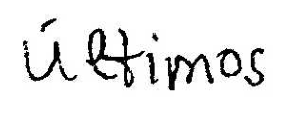

In [53]:
zipped_data = h5.File(f"../../data-sources/minified/spanish.h5", "r")

sample_key = list(zipped_data["train"].keys())[-20]
sample_value = zipped_data["train"].get(sample_key)

print("(Training Set) Label:", sample_value.attrs.get("label").decode("utf-8"))
print(sample_value.attrs["intlabel"][:])

image = sample_value[:]

plt.figure(figsize=(5,3))
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

zipped_data.close()

(1, 119, 293, 1)


IndexError: index 4 is out of bounds for axis 0 with size 4

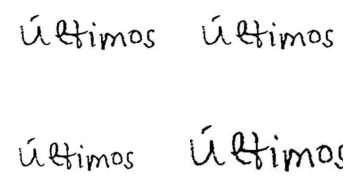

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_input = np.expand_dims(np.array([image]), -1)
print(datagen_input.shape)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zoom_range=0.2,
    shear_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05)

BATCH_SIZE = 4

_, axes =  plt.subplots(BATCH_SIZE // 2, BATCH_SIZE // 2)
axes = axes.flatten()

for idx, gen_image in enumerate(datagen.flow(datagen_input, batch_size=4)):
    axes[idx].imshow(gen_image[0, :, :, 0], cmap="gray")
    axes[idx].axis('off')


## `IAM-word` dataset

A custom dataset of 75602 samples.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

source_dir = "../data-sources/iam-word-dataset"
dest_dir = "../data-sources/minified"

iam_data = pd.read_csv(f"{source_dir}/words.csv", sep=";")
iam_data["word"] = iam_data["word"].apply(str.strip)

print(iam_data.shape)
iam_data.head(2)

In [ ]:
def id_to_fpath(_id: str):
    form_group, form_id, _, _ = _id.split("-")
    return f"{form_group}/{form_group}-{form_id}/{_id}.png"
    
iam_data["fpath"] = iam_data["id"].apply(id_to_fpath)
iam_data["line_id"] = iam_data["id"].apply(lambda x: x[:-3])

print(iam_data.shape)
iam_data.head(2)

In [ ]:
filter_empty_files = iam_data["fpath"].apply(lambda x: os.path.getsize(f"{source_dir}/{x}") > 0)
iam_data = iam_data[filter_empty_files]

print(iam_data.shape)
iam_data.head(2)

In [ ]:
heights, widths = [], []

for fpath in iam_data["fpath"]:
    image = cv2.imread(f"{source_dir}/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])

print(np.mean(heights), np.mean(widths))

In [ ]:
iam_data["word"].value_counts()

### Split into train / test / validation sets

These sets are preset in `.txt` files.

In [ ]:
splits_dir = "../data-sources/iam-word-dataset/largeWriterIndependentTextLineRecognitionTask"

train_set_ids = pd.read_csv(f"{splits_dir}/trainset.txt", names=["id"])
test_set_ids = pd.read_csv(f"{splits_dir}/testset.txt", names=["id"])
valid1_set_ids = pd.read_csv(f"{splits_dir}/validationset1.txt", names=["id"])
valid2_set_ids = pd.read_csv(f"{splits_dir}/validationset2.txt", names=["id"])

print(train_set_ids.shape)
train_set_ids.head(2)

In [ ]:
filter_train, filter_test, filter_valid = False, False, False

for _, row in train_set_ids.iterrows():
    filter_train = filter_train | (iam_data["line_id"] == row.id)
    
for _, row in test_set_ids.iterrows():
    filter_test = filter_test | (iam_data["line_id"] == row.id)
    
for _, row in valid1_set_ids.iterrows():
    filter_valid = filter_valid | (iam_data["line_id"] == row.id)
    
for _, row in valid2_set_ids.iterrows():
    filter_valid = filter_valid | (iam_data["line_id"] == row.id)

In [ ]:
train_set = iam_data[filter_train]
test_set = iam_data[filter_test]
valid_set = iam_data[filter_valid]

print(train_set.shape, test_set.shape, valid_set.shape)

Check out this alternative implementation (it's waaaaaaaaaay slower!):

```python
train_data = pd.DataFrame(columns=["fpath", "word"])

for line in train_iam_data:
    subset = iam_data[iam_data["id"].str.contains(line)]
    
    train_data = pd.concat([train_data, subset[["fpath", "word"]]])
    
# CPU Wall time: 5min 39s
```

In [ ]:
%%time

from recognition import TinyData

TinyData.minify(
    train_set, test_set, valid_set,
    source_dir=source_dir, target_path=f"{dest_dir}/iam.h5",
    name_label="id", x_label="fpath", y_label="word",
    color=False
)

In [ ]:
zipped_data = h5.File(f"{dest_dir}/iam.h5", "r")

sample_key = list(zipped_data["test"].keys())[20]
sample_value = zipped_data["test"].get(sample_key)

print("(Test Set) Label:", sample_value.attrs.get("label").decode("utf-8"))
print(sample_value.attrs.get("intlabel"))

plt.figure(figsize=(5,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()

## `RIMES2011-word` dataset

+ Dataset of french words with 75602 samples.
+ Predefined train / test / validation splits are defined in `.txt` files.
+ Dataset is already classified into the different splits.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

source_dir = "../data-sources/rimes-words-2011"
dest_dir = "../data-sources/minified"

train_set = pd.read_csv(f"{source_dir}/train_set/groundtruth_training_icdar2011.txt", sep=" ", names=["fpath", "word"])
test_set = pd.read_csv(f"{source_dir}/test_set/grount_truth_test_icdar2011.txt", sep=" ", names=["fpath", "word"])
valid_set = pd.read_csv(f"{source_dir}/valid_set/ground_truth_validation_icdar2011.txt", sep=" ", names=["fpath", "word"])

print("Train:", train_set.shape, "| Test:", test_set.shape, "| Validation:", valid_set.shape)
train_set.head(2)

### Removing empty or inexistent files

In [ ]:
from recognition import TinyData
import cv2

image_path = f"{source_dir}/train_set/{train_set.loc[1, 'fpath']}"
image = TinyData.imread(image_path)
                        
print(image.shape, train_set.loc[1, 'word'])
plt.figure(figsize=(3,3))
plt.imshow(image, cmap="gray")

In [ ]:
os.path.isfile(f"{source_dir}/train_set/{train_set.loc[0, 'fpath']}")

In [ ]:
def non_empty_file(fpath):
    """Filter out files that don't exist or are empty"""
    if os.path.isfile(fpath):
        return os.path.getsize(fpath) > 0
    else:
        return False

filter_empty_files = train_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/train_set/{x}"))
train_set = train_set[filter_empty_files]

filter_empty_files = test_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/test_set/{x}"))
test_set = test_set[filter_empty_files]

filter_empty_files = valid_set["fpath"].apply(lambda x: non_empty_file(f"{source_dir}/valid_set/{x}"))
valid_set = valid_set[filter_empty_files]

print("Train:", train_set.shape, "| Test:", test_set.shape, "| Validation:", valid_set.shape)

In [ ]:
train_set["name"] = train_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])
test_set["name"] = test_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])
valid_set["name"] = valid_set["fpath"].apply(lambda x: x.replace(".tiff", "").split("/")[-1])

valid_set.head(2)

In [ ]:
heights, widths = [], []

for fpath in train_set["fpath"]:
    image = cv2.imread(f"{source_dir}/all_sets/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])

for fpath in test_set["fpath"]:
    image = cv2.imread(f"{source_dir}/all_sets/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])
    
for fpath in valid_set["fpath"]:
    image = cv2.imread(f"{source_dir}/all_sets/{fpath}", 0)
    heights.append(image.shape[0])
    widths.append(image.shape[1])
    
print(np.mean(heights), np.mean(widths))

In [ ]:
%%time
from recognition import TinyData

# I temporarily created a folder "all_sets" and moved there all image folders - instead of modifying the package :\/
TinyData.minify(
    train_set, test_set, valid_set,
    source_dir=f"{source_dir}/all_sets", target_path=f"{dest_dir}/rimes2011.h5",
    name_label="name", x_label="fpath", y_label="word",
    color=False
)

In [ ]:
zipped_data["valid"][sample_key].attrs["label"]

In [ ]:
zipped_data = h5.File(f"{dest_dir}/rimes2011.h5", "r")

sample_key = list(zipped_data["valid"].keys())[1]
sample_value = zipped_data["valid"].get(sample_key)

print("(Validation Set) Label:", sample_value.attrs.get("label").decode("utf-8"))

plt.figure(figsize=(3,3))
plt.imshow(sample_value[:], cmap="gray")
plt.show()

zipped_data.close()

---

## `spelling`

In [ ]:
from recognition import TextChecker

predicted_text = [
    "En um tugar de la Mancha, de cuio nombre no quiero acordarme, no ha mucho tiempo que vivía un",
    "hidalgo de los de lanza en astihhero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más",
    "vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lantejas los viernes, algún",
    "palomino de añadidura los domingos, consumían las tres partes de su hacienda."
]

corrector = TextChecker(predicted_text)
print(corrector.correct())

---

## `text`

In [ ]:
from recognition import RecognitionNet, StringVectorizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

net = RecognitionNet(".")
net.load_chkpt()
net.model.summary()

In [ ]:
image = imload("../data-sources/spanish-words-mini/w09_bw_07.png")
image = to_gray(image)

plt.imshow(image, cmap="gray")
plt.show()

In [ ]:
width, height, _ = net.model.layers[0].input_shape[0][1:]
IMAGE_RATIO = width / height

image = RecognitionNet.preprocess(image, aspect_ratio=IMAGE_RATIO, target_size=(width, height))
image = np.expand_dims(image, axis=0)

image.shape

In [ ]:
vect = StringVectorizer()

preds, probs = net.predict(image)

output = vect.decode(preds[0].flatten())
print(output)

---

## `color`

In [ ]:
from PIL import Image
from preproc import Quantize
import matplotlib.pyplot as plt
import numpy as np
import cv2

def imload(fpath):
    return cv2.cvtColor(cv2.imread(fpath), cv2.COLOR_BGR2RGB)

image1 = imload("../data-sources/spanish-words-mini/w09_rgb_07.png")
image2 = imload("../data-sources/spanish-words-mini/w09_rgb_08.png")
# image = Quantize.reduce_palette(image, num_colors=4)
# image = (image * 255.).astype(np.uint8)

_, axes = plt.subplots(1, 2, figsize=(8,5))

axes[0].imshow(image1)
axes[0].axis("off")
axes[1].imshow(image2)
axes[1].axis("off")
plt.show()

In [ ]:
from recognition import HighlightDetector

net = HighlightDetector()
net.load_model()
net.model.summary()

In [ ]:
height, width, _ = net.model.layers[0].input_shape[1:]

# image is resized to meeet net's input shape, then color-quantized and scaled down to [0..1]
image1 = cv2.resize(image1, (height, width), cv2.INTER_CUBIC)
image1 = HighlightDetector.preprocess(image1)

image2 = cv2.resize(image2, (height, width), cv2.INTER_CUBIC)
image2 = HighlightDetector.preprocess(image2)

_, axes = plt.subplots(1, 2, figsize=(8,5))
axes[0].imshow(image1)
axes[0].axis("off")
axes[1].imshow(image2)
axes[1].axis("off")
plt.show()

In [ ]:
1 - (1.5 * 60) / (20 * 60)

In [ ]:
717 / (1024 + 340)

In [ ]:
# innput = np.expand_dims(image, axis=0)
innput = np.concatenate([[image1], [image2]])

in_class = net.predict(innput)

for pred_class in in_class:
    print(HighlightDetector.decode(pred_class))

---

In [ ]:
from recognition import ColorGroup, ColorExtractor

predictor = ColorGroup()
colors = ColorExtractor(image).palette()
print(colors)

In [ ]:
cnames = [predictor.predict(color) for color in colors]

cnames[:3]